### Read the input files to do some descriptive analysis and visualization

In [1]:
import sys
sys.path.append('eval/')

import datetime 
import geopandas as gpd
# import geoplot as gplt
# import geoplot.crs as gcrs
# import mapclassify as mc
# from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
from pyproj import CRS
from shapely import wkt
from shapely.geometry import Polygon, Point

import util_plot
from setup import *

%matplotlib inline
plt.rcParams.update({'font.size': 10})
# contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [68]:
rail1 = pd.read_csv(project_data_dir+"data_processed/rail_catchment/rail_df_190801_200315.csv")
rail2 = pd.read_csv(project_data_dir+"data_processed/rail_catchment/rail_df_200316_201031.csv")
rail2['ts'] += rail1['ts'].max()+1
rail = pd.concat([rail1, rail2])
rail['day'] = rail['ts']//96
rail['week'] = rail['ts'] // 96 // 7
# bus = pd.read_csv(data_dir+"data_processed/rail_catchment/"+period+"/bus_rail_df.csv")
# rail = pd.read_csv(data_dir+"data_processed/rail_catchment/"+period+"/rail_rail_df.csv")

In [2]:
tnc1 = pd.read_csv(project_data_dir+"data_processed/census_tract/tnc_df_190801_200301.csv")
tnc2 = pd.read_csv(project_data_dir+"data_processed/census_tract/tnc_df_200302_201031.csv")
tnc2['ts'] += tnc1['ts'].max()+1
tnc = pd.concat([tnc1, tnc2])


In [3]:
tnc['week'] = tnc['ts'] // 96 // 7

# Time Series

In [58]:
df = rail
df['day'] = df['ts'] // 96
df['week'] = df['day']//7
df = df.groupby(['week','station_id'], as_index=False).sum()
df = df.sort_values(by='week')
# downtown_stations = pd.read_csv(data_dir+"data_processed/downtown_stations.csv")
# df = df[df['station_id'].isin(downtown_stations['STATION_ID'].tolist())]

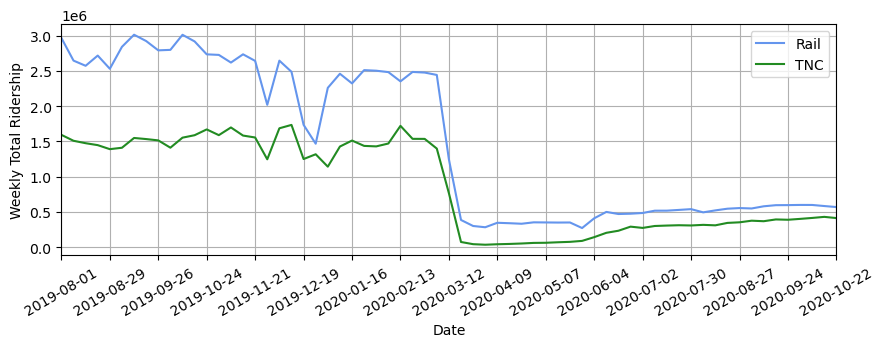

In [75]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(rail.groupby('week').sum()['count'], color='cornflowerblue',label='Rail')
ax.plot(tnc.groupby('week').sum()['trips'], color='forestgreen',label='TNC')
ax.set_xlim([0,len(rail['week'].drop_duplicates())-2])
ax.set_xticks(np.arange(0,len(rail['week'].drop_duplicates()),4))
ax.set_xticklabels(pd.date_range(start="2019-08-01",end="2020-10-31", freq='28D').date, rotation=30)
ax.set_ylabel("Weekly Total Ridership")
ax.set_xlabel("Date")
ax.legend()
ax.grid()
fig.savefig(data_dir+"data_processed/weekly_demand_viz.png", bbox_inches='tight')

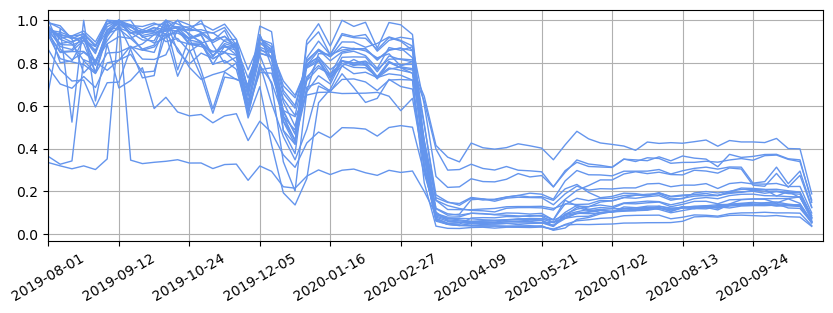

In [54]:
# individual stations
fig, ax = plt.subplots(figsize=(10,3))
for station_id, grp in df.groupby('station_id'):
    r = np.random.rand()
    if r < 0.1:
#         ax.plot(dates.iloc[grp['day'].to_numpy()]['index'], grp['count']/grp['count'].max(), linewidth=1, color='cornflowerblue')
        ax.plot(grp['week'], grp['count']/grp['count'].max(), linewidth=1, color='cornflowerblue')
ax.set_xlim([0,len(grp)])
ax.set_xticks(np.arange(0,len(grp),6))
ax.set_xticklabels(pd.date_range(start="2019-08-01",end="2020-10-31", freq='42D').date, rotation=30)
ax.grid();